# Train Models using Feast historical data

* Collect historical features from Feast
* Rebuild the MNIST dataset from the features
* Train different models using the dataset
* Register models using Model Registry

In [9]:
# !pip uninstall -r requirements.txt --yes
# !pip uninstall onnx --yes
# !pip uninstall tf2onnx --yes
# !pip uninstall skl2onnx --yes
# !pip install feast==0.36.0
# !pip install typing_extensions
# !pip list | grep onnx

In [10]:
!pip install --upgrade pip
!cat requirements.txt
!pip install -q -r requirements.txt

feast==0.36.0
psycopg2>=2.9
onnx==1.14.1
#onnxruntime==1.14.1
#tf2onnx
#typing-extensions==4.5.0


## Collect historical data

**Note**: update this value to match the actual data

In [11]:
from datetime import datetime, timedelta
ts = datetime(2024, 4, 1, 12, 30, 0)

In [12]:
%env REPO_PATH=mnist_demo/feature_repo/

env: REPO_PATH=mnist_demo/feature_repo/


In [13]:
from feast import FeatureStore
import pandas as pd
import os

print(f'Testing for {ts}')
entity_df = pd.DataFrame.from_dict(
    {
        "image_id": list(range(1, 70001)),
        "event_timestamp": [ts] * 70000,
    }
)

store = FeatureStore(repo_path=os.environ['REPO_PATH'])    
features = [f"mnist:feature_{i+1}" for i in range(28)]
features.append("mnist:number")
historical_df = store.get_historical_features(
    entity_df=entity_df,
    features=features,
).to_df()

Testing for 2024-04-01 12:30:00


In [14]:
len(historical_df)

70000

In [15]:
historical_df.head()

,image_id,event_timestamp,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,number
0,11,2024-04-01 12:30:00,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.403...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...",...,"(0.0,0.0,0.0,0.0,0.0,0.0,0.07450980392156863,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.6431372549019608,0....","(0.0,0.0,0.0,0.0,0.0,0.0,0.2235294117647059,0....","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549019607843137...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02745098039...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...",3
1,16,2024-04-01 12:30:00,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...",...,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1568627...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6470588...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16862745098...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.53725490196...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.26274509803...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...",7
2,34,2024-04-01 12:30:00,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...",...,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0117647...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1960784...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15686274509...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058823529411764...","(0.0,0.0,0.0,0.0,0.0,0.0,0.11764705882352941,0...","(0.0,0.0,0.0,0.0,0.0,0.01568627450980392,0.627...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...",9
3,37,2024-04-01 12:30:00,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...",...,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1019607...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...",6
4,39,2024-04-01 12:30:00,"(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...","(0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [16]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   image_id         70000 non-null  int64         
 1   event_timestamp  70000 non-null  datetime64[ns]
 2   feature_1        70000 non-null  object        
 3   feature_2        70000 non-null  object        
 4   feature_3        70000 non-null  object        
 5   feature_4        70000 non-null  object        
 6   feature_5        70000 non-null  object        
 7   feature_6        70000 non-null  object        
 8   feature_7        70000 non-null  object        
 9   feature_8        70000 non-null  object        
 10  feature_9        70000 non-null  object        
 11  feature_10       70000 non-null  object        
 12  feature_11       70000 non-null  object        
 13  feature_12       70000 non-null  object        
 14  feature_13       70000 non-null  objec

## Prepara dataset

Remove rows with null features

In [17]:
for id in range(28):
    historical_df.dropna(subset=[f'feature_{id+1}'], inplace=True)

In [18]:
len(historical_df)

70000

In [19]:
# import base64

# # String to encode
# original_string = ','.join([historical_df[f'feature_{id+1}'].iloc[0] for id in range(28)])

# # Encode the string to Base64
# encoded_string = base64.b64encode(original_string.encode()).decode()

# print(original_string)
# print(len(original_string))
# print(encoded_string)
# print(len(encoded_string))

Rebuild the MNIST dataset.

Goal is to recreate the `numpy` arrays that can feed the trained models.

In [20]:
images = []

Load features and revert column to rows.

**Note**: `feature_N` columns contain string representation of `list<float>`, so they must be reverted to the original data types.

The execution of these commands can take some minutes.

In [21]:
import numpy as np
import ast

for index in range(len(historical_df)):
    image_id = historical_df['image_id'].iloc[index]
    # print(f'Rebuild {image_id} at index {index}')
    image = [list(map(float, ast.literal_eval(
        historical_df[f'feature_{id+1}'].iloc[index]))) for id in range(28)]
    images.append(image)

Extract the prediction column `number`

In [22]:
numbers = []
for index in range(len(historical_df)):
    numbers.append(int(historical_df['number'].iloc[index]))
print(len(numbers))

70000


Assign a fixed percentage of 20% to testing data

In [23]:
split = int(len(images) * 0.8)
train_images = images[:split]
test_images = images[split:]
train_numbers = numbers[:split]
test_numbers = numbers[split:]

X_train = np.array(train_images)
y_train = np.array(train_numbers)
X_test = np.array(test_images)
y_test = np.array(test_numbers)

In [24]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (56000, 28, 28)
y_train: (56000,)
X_test: (14000, 28, 28)
y_test: (14000,)


Plot some data samples to validate the transformation

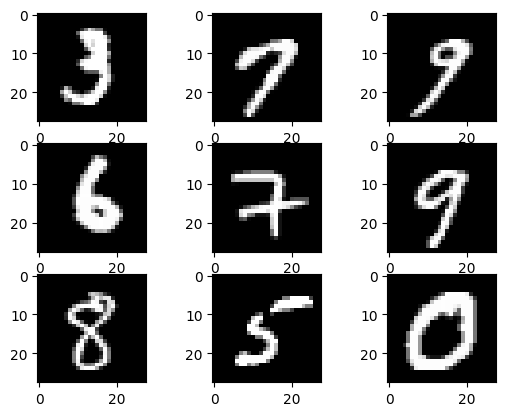

In [25]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Train simple neural network

Let's train a simple neural network.

In [26]:
model_name = 'simpleNN'

In [27]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.2984 - accuracy: 0.9134 - val_loss: 0.1770 - val_accuracy: 0.9479
Epoch 2/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.1242 - accuracy: 0.9622 - val_loss: 0.1186 - val_accuracy: 0.9629
Epoch 3/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0833 - accuracy: 0.9744 - val_loss: 0.0979 - val_accuracy: 0.9721
Epoch 4/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0614 - accuracy: 0.9809 - val_loss: 0.1112 - val_accuracy: 0.9675
Epoch 5/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.0888 - val_accuracy: 0.9752
Epoch 6/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0393 - accuracy: 0.9872 - val_loss: 0.0960 - val_accuracy: 0.9720
Epoch 7/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.0307 - accuracy: 0.9898 - val_loss: 0.1033 - val_accuracy:

Evaluate model accuracy using test data

In [29]:
from sklearn.metrics import accuracy_score
from IPython.display import Markdown as md

def evaluateModelAccuracy(model, model_name):
    y_prob = model.predict(X_test)
    y_pred = y_prob.argmax(axis=1)
    accuracy = accuracy_score(y_test,y_pred)
    print(f'Prediction accuracy for model `{model_name}` is: {round(accuracy * 100, 2)}%')


In [30]:
evaluateModelAccuracy(model, model_name)

438/438 [==============================] - 1s 1ms/step
Prediction accuracy for model `simpleNN` is: 97.53%


### Evaluate the trained model

In [31]:
import matplotlib.pyplot as plt

def testModelForSample(model, sample_id):
    plt.imshow(X_test[sample_id], cmap="Greys")
    plt.title(f'X_test[{sample_id}]:')
    plt.show()
    prediction = model.predict(X_test[sample_id].reshape(1,28,28)).argmax(axis=1)[0]
    print(f'prediction for sample {sample_id} is: ', prediction)
    print(f'**Note**: the calculated prediction {prediction} must match the number plotted above. If not, the test failed')
    

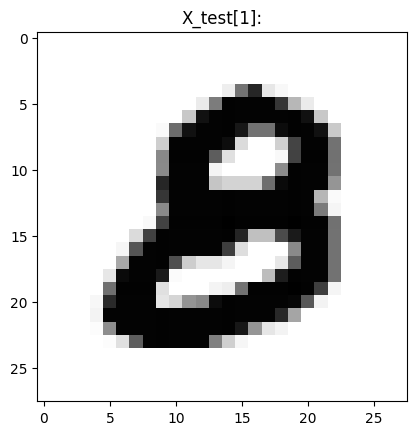

1/1 [==============================] - 0s 16ms/step
prediction for sample 1 is:  8
**Note**: the calculated prediction 8 must match the number plotted above. If not, the test failed


In [32]:
testModelForSample(model, 1)

### Save the model as ONNX file

In [33]:
!pip install onnx
!pip install onnxruntime
!pip install tf2onnx
!pip list | grep onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.3
    Uninstalling protobuf-4.23.3:
      Successfully uninstalled protobuf-4.23.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-health-checking 1.62.1 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
grpcio-reflection 1.62.1 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
grpcio-tools 1.62.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
kfp 1.8.22 requires pydantic<2,>=1.8.2, but you have pydantic 2.6.4 which is incompatible.
ml-metadata 1.14.0+remote.1 requires attrs<22,>=20.3, but you have attrs 23.2.0 which is incompatible.
model-registry 0.1.2 requires attrs<22.0,>=21.0, but you have attrs 23.

In [34]:
import tensorflow as tf
import onnx
import onnxruntime as ort
import tf2onnx

def saveModel(model, model_name):
    input_signature = [tf.TensorSpec([1, 28, 28], tf.double, name='x')]
    onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=12)
    file_name = f"{model_name}.onnx"
    onnx.save(onnx_model, file_name)
    print(f"Saved as {file_name}")
    return file_name

In [35]:
file_name = saveModel(model, model_name)

Saved as simpleNN.onnx


2024-04-11 13:59:21.820294: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-11 13:59:21.820435: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2024-04-11 13:59:21.855825: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-11 13:59:21.856344: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session


### Test the saved model

In [36]:
def testModelFromFileForSample(file_name, sample_id):
    plt.imshow(X_test[sample_id], cmap="Greys")
    plt.title(f'X_test[{sample_id}]:')
    plt.show()
    model_onnx = onnx.load(file_name)
    output = [node.name for node in model_onnx.graph.output]
    print(output)

    sess = ort.InferenceSession(file_name)
    results_ort = sess.run([output[0]], {'x': X_test[sample_id].reshape(1,28,28)})
    prediction = results_ort[0].argmax(axis=1)[0]
    print(f'**Note**: the calculated prediction {prediction} must match the number plotted above. If not, the test failed')

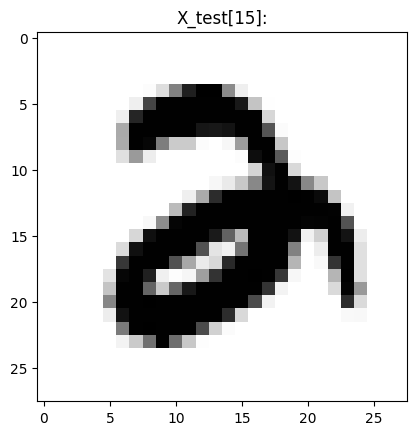

['dense_2']
**Note**: the calculated prediction 2 must match the number plotted above. If not, the test failed


In [37]:
testModelFromFileForSample(file_name, 15)

### Store the model to S3 compatible bucket

In [38]:
os.environ['accesskey'] = 'boIJgrAVBuIcmkNh1Dv6'
os.environ['secretkey'] = 'yGGRnBVRHTWN1un8il2dZjq3JhaTe0kmzmOZjRZT'
# 'http://minio-service.kubeflow.svc.cluster.local:9000'
s3url = 'https://play.min.io:9000'
bucket_name = 'feast'

In [47]:
import boto3

def storeTrainedModel(model, model_name, file_name):
    registeredmodel_name = "mnist"
    version_name = "v."+model_name+"."+datetime.now().strftime("%Y%m%d%H%M%S")
    print(f"Will be using: {registeredmodel_name}:{version_name} in the remainder of this task")

    # Updated config for https://play.min.io:9443/
    s3 = boto3.resource(
        service_name='s3',
        # region_name='default',
        aws_access_key_id=os.environ['accesskey'],
        aws_secret_access_key=os.environ['secretkey'],
        # use_ssl=False,
        endpoint_url=s3url,
        # config=boto3.session.Config(signature_version='s3v4'),
        verify=False
    )

    odh_secret_name = f'aws-connection-{bucket_name}'
    in_bucket_path = version_name
    in_bucket_target = f'{in_bucket_path}/{file_name}'
    full_bucket_target = f's3://{bucket_name}/{in_bucket_target}'

    my_bucket = s3.Bucket(bucket_name)
    my_bucket.upload_file(file_name, in_bucket_target)

    print(f"Objects in the {bucket_name} bucket:")
    for obj in my_bucket.objects.filter():
        print(obj.key)
    return (registeredmodel_name, version_name, odh_secret_name, in_bucket_path,in_bucket_target, full_bucket_target)

In [48]:
registeredmodel_name, version_name, odh_secret_name, in_bucket_path,in_bucket_target, full_bucket_target = storeTrainedModel(model, model_name, file_name)

Will be using: mnist:v.simpleNN.20240411140612 in the remainder of this task


/opt/app-root/lib64/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'play.min.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Objects in the feast bucket:
v.simpleNN.20240411111641/simpleNN.onnx
v.simpleNN.20240411124007/simpleNN.onnx
v.simpleNN.20240411124113/simpleNN.onnx
v.simpleNN.20240411124614/simpleNN.onnx
v.simpleNN.20240411125019/simpleNN.onnx
v.simpleNN.20240411125042/simpleNN.onnx
v.simpleNN.20240411125836/simpleNN.onnx
v.simpleNN.20240411131553/simpleNN.onnx
v.simpleNN.20240411135922/simpleNN.onnx
v.simpleNN.20240411140459/simpleNN.onnx
v.simpleNN.20240411140612/simpleNN.onnx
v2.nb20240411132338/mnist.onnx


/opt/app-root/lib64/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'play.min.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [50]:
registeredmodel_name, version_name

('mnist', 'v.simpleNN.20240411140612')

### Register with Model Registry

In [ ]:
!pip install --no-deps --ignore-requires-python "https://github.com/opendatahub-io/ml-metadata/releases/download/v1.14.0%2Bremote.1/ml_metadata-1.14.0+remote.1-py3-none-any.whl" # need a Python 3.11 compatible version
!pip install --no-deps --ignore-requires-python "model-registry==0.1.2" # ignore dependencies because of the above override

In [71]:
from model_registry import ModelRegistry

def registerToModelRegistry(
    registeredmodel_name,
    version_name,
    odh_secret_name,
    in_bucket_path,
    in_bucket_target,
    full_bucket_target):
    registry = ModelRegistry(server_address="modelregistry-sample.feast.svc.cluster.local", port=9090, author="mmortari")

    rm = registry.register_model(registeredmodel_name,
                                    full_bucket_target,
                                    model_format_name="onnx",
                                    model_format_version="1",
                                    storage_key=odh_secret_name,
                                    storage_path=in_bucket_path,
                                    version=version_name,
                                    description="demo20231121 e2e MNIST",
                                    )
    print("RegisteredModel:")
    print(registry.get_registered_model(registeredmodel_name))
    print("ModelVersion:")
    print(registry.get_model_version(registeredmodel_name, version_name))
    print("ModelArtifact:")
    print(registry.get_model_artifact(registeredmodel_name, version_name))
    return registry

In [58]:
registerToModelRegistry(
    registeredmodel_name, version_name, odh_secret_name, in_bucket_path,in_bucket_target, full_bucket_target
)

RegisteredModel:
RegisteredModel(id='1', description='', external_id='', create_time_since_epoch=1712848296896, last_update_time_since_epoch=1712848296896, state=<ContextState.LIVE: 'LIVE'>, name='mnist')
ModelVersion:
ModelVersion(name='v.simpleNN.20240411140612', id='2', description='demo20231121 e2e MNIST', external_id='', create_time_since_epoch=1712848297507, last_update_time_since_epoch=1712848297507, state=<ContextState.LIVE: 'LIVE'>, model_name='mnist', version='v.simpleNN.20240411140612', author='mmortari', metadata={}, artifacts=NOTHING, _registered_model_id=NOTHING)
ModelArtifact:
ModelArtifact(id='1', description='', external_id='', create_time_since_epoch=1712848298399, last_update_time_since_epoch=1712848298399, name='mnist', uri='s3://feast/v.simpleNN.20240411140612/simpleNN.onnx', state=<ArtifactState.UNKNOWN: 0>, model_format_name='onnx', model_format_version='1', storage_key='aws-connection-feast', storage_path='v.simpleNN.20240411140612', service_account_name='', _mo

## Train a convoluted neural network

Let's train a an alternative, a convoluted neural network:

In [59]:
model_name = 'convolutedNN'

In [60]:
model = Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 64)                346176    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                      

In [61]:
history = model.fit(X_train,y_train,epochs=3)

Epoch 1/3


2024-04-11 15:11:58.820339: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 175616000 exceeds 10% of free system memory.


1750/1750 [==============================] - 20s 11ms/step - loss: 0.2672 - accuracy: 0.9199
Epoch 2/3
1750/1750 [==============================] - 19s 11ms/step - loss: 0.1140 - accuracy: 0.9645
Epoch 3/3
1750/1750 [==============================] - 19s 11ms/step - loss: 0.0835 - accuracy: 0.9734


In [62]:
evaluateModelAccuracy(model, model_name)

438/438 [==============================] - 1s 3ms/step
Prediction accuracy for model `convolutedNN` is: 98.05%


### Evaluate the trained model

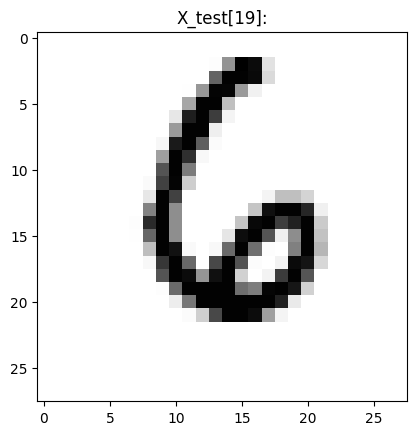

1/1 [==============================] - 0s 15ms/step
prediction for sample 19 is:  6
**Note**: the calculated prediction 6 must match the number plotted above. If not, the test failed


In [63]:
testModelForSample(model, 19)

### Save the model as ONNX file

In [64]:
!pip install onnx==1.16.0
!pip install tf2onnx==1.16.0
!pip install skl2onnx==1.16.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 200.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: onnx
    Found existing installation: onnx 1.14.1
    Uninstalling onnx-1.14.1:
      Successfully uninstalled onnx-1.14.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.7/455.7 kB 25.8 MB/s eta 0:00:00
  Attempting uninstall: tf2onnx
    Found existing installation: tf2onnx 1.16.1
    Uninstalling tf2onnx-1.16.1:
      Successfully uninstalled tf2onnx-1.16.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 250.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 122.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour 

In [65]:
input_signature = [tf.TensorSpec([1, 28, 28], tf.double, name='x')]
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=12)
onnx.save(onnx_model, "model2.onnx")

2024-04-11 15:13:25.471857: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-11 15:13:25.472034: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2024-04-11 15:13:25.518696: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-11 15:13:25.518836: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session


In [66]:
file_name = saveModel(model, model_name)

2024-04-11 15:13:25.642894: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-11 15:13:25.643025: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session


Saved as convolutedNN.onnx


2024-04-11 15:13:25.680581: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-04-11 15:13:25.680759: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session


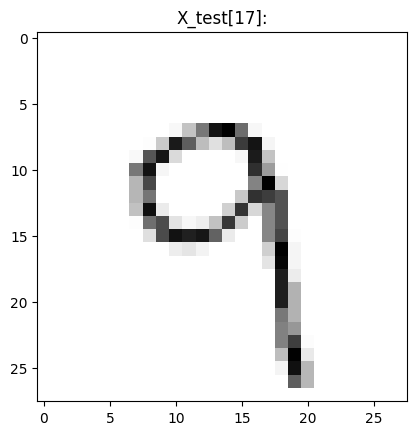

['dense_4']
**Note**: the calculated prediction 9 must match the number plotted above. If not, the test failed


In [68]:
testModelFromFileForSample(file_name, 17)

In [69]:
registeredmodel_name, version_name, odh_secret_name, in_bucket_path,in_bucket_target, full_bucket_target = storeTrainedModel(model, model_name, file_name)

Will be using: mnist:v.convolutedNN.20240411151425 in the remainder of this task


/opt/app-root/lib64/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'play.min.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


Objects in the feast bucket:
v.convolutedNN.20240411151425/convolutedNN.onnx
v.simpleNN.20240411111641/simpleNN.onnx
v.simpleNN.20240411124007/simpleNN.onnx
v.simpleNN.20240411124113/simpleNN.onnx
v.simpleNN.20240411124614/simpleNN.onnx
v.simpleNN.20240411125019/simpleNN.onnx
v.simpleNN.20240411125042/simpleNN.onnx
v.simpleNN.20240411125836/simpleNN.onnx
v.simpleNN.20240411131553/simpleNN.onnx
v.simpleNN.20240411135922/simpleNN.onnx
v.simpleNN.20240411140459/simpleNN.onnx
v.simpleNN.20240411140612/simpleNN.onnx
v2.nb20240411132338/mnist.onnx


/opt/app-root/lib64/python3.9/site-packages/urllib3/connectionpool.py:1061: InsecureRequestWarning: Unverified HTTPS request is being made to host 'play.min.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [74]:
registry = registerToModelRegistry(
    registeredmodel_name, version_name + "1", odh_secret_name, in_bucket_path,in_bucket_target, full_bucket_target
)

RegisteredModel:
RegisteredModel(id='1', description='', external_id='', create_time_since_epoch=1712848296896, last_update_time_since_epoch=1712848296896, state=<ContextState.LIVE: 'LIVE'>, name='mnist')
ModelVersion:
ModelVersion(name='v.convolutedNN.202404111514251', id='4', description='demo20231121 e2e MNIST', external_id='', create_time_since_epoch=1712848595407, last_update_time_since_epoch=1712848595407, state=<ContextState.LIVE: 'LIVE'>, model_name='mnist', version='v.convolutedNN.202404111514251', author='mmortari', metadata={}, artifacts=NOTHING, _registered_model_id=NOTHING)
ModelArtifact:
ModelArtifact(id='3', description='', external_id='', create_time_since_epoch=1712848596099, last_update_time_since_epoch=1712848596099, name='mnist', uri='s3://feast/v.convolutedNN.20240411151425/convolutedNN.onnx', state=<ArtifactState.UNKNOWN: 0>, model_format_name='onnx', model_format_version='1', storage_key='aws-connection-feast', storage_path='v.convolutedNN.20240411151425', servic

In [75]:
import pprint

pprint.pprint(registry._api.get_registered_models())
pprint.pprint(registry._api.get_model_versions(registered_model_id=1))

[RegisteredModel(id='1', description='', external_id='', create_time_since_epoch=1712848296896, last_update_time_since_epoch=1712848296896, state=<ContextState.LIVE: 'LIVE'>, name='mnist')]
[ModelVersion(name='v.simpleNN.20240411140612', id='2', description='demo20231121 e2e MNIST', external_id='', create_time_since_epoch=1712848297507, last_update_time_since_epoch=1712848297507, state=<ContextState.LIVE: 'LIVE'>, model_name='mnist', version='v.simpleNN.20240411140612', author='mmortari', metadata={}, artifacts=NOTHING, _registered_model_id=NOTHING),
 ModelVersion(name='v.convolutedNN.20240411151425', id='3', description='demo20231121 e2e MNIST', external_id='', create_time_since_epoch=1712848490807, last_update_time_since_epoch=1712848490807, state=<ContextState.LIVE: 'LIVE'>, model_name='mnist', version='v.convolutedNN.20240411151425', author='mmortari', metadata={}, artifacts=NOTHING, _registered_model_id=NOTHING),
 ModelVersion(name='v.convolutedNN.202404111514251', id='4', descrip